In [68]:
# analise de risco de credito, categorizando os clientes Baixo, medio, alto.
# com base no dataset onde já conhecimos os riscos.
# treinaremos a maquina para poder classificar os próximos clientes

## Aprendizado Supervisionado - Classificação

### Qual é o comportamento dos meus clientes com cartão de crédito?

In [69]:
import pandas as pd

dataframe = pd.read_csv("AluraData/CC General.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [70]:
#verificar os dados faltantes
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [71]:
#colocaremos a mediana nos dados faltantes
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [72]:
#normalizando os dados, colocando os dados na frequencia entre 0 e 1
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [73]:
#clusterizando os dados, agrupando os dados por aproximação
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [74]:
#metrica de Silhueta calcula a distância média entre os pontos
#media de todos os pontos
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3644845919974304


In [75]:
#metrica davies bouldin
#calcula o centroide de cada cluster
#calculao a distancia entre os cluster pelo centroide de cada e retira a media
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.075713859061329


In [76]:
#metrica Calinski-Harabasz
#considera a dispersão dos pontos dentro do cluster
#considera a dispersão dos pontos entre os cluster
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.7937428414293


In [77]:
#testando se as metricas acima são boas ou ruins
#validação relativa, comparar as metricas com base em configuração diferente do algoritimo, Kmeans
#Ajustaremos os parâmetros para o obter o melhor resultado.
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski


In [78]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.32724464582661594 1.3093507662143313 3526.4668344515408


In [79]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3646017628085195 1.0753510081923618 3431.783254564093


In [80]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.23930509485852222 1.2177189629193967 1619.2881787814124


In [81]:
#Criando dados aleatórios para utilizar no algoritimo
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.0401825858182126 3.4583375911498875 305.52250551234505
0.3646017628085195 1.0753510081923618 3431.783254564093


In [82]:
#validar a estabilidade do cluster.
#dividir a base de dados e rodar o kMeans para cada divisão
#queremos que o resultado das metricas sejam similares
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3692455604046628 1.0550439720459244 1203.9722444846886
0.35406999696241026 1.138955453029994 1194.9454119497238
0.3668564117315988 1.0993525253456349 1167.5313082261505


<function matplotlib.pyplot.show(close=None, block=None)>

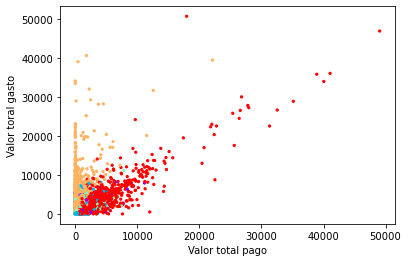

In [83]:
#interpretando os clusters, plotaremos os resultados
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'],c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor toral gasto")
plt.show

In [84]:
#plotaremos as dimensões comparando de 2 em 2.
#comentaremos o código abaixo, pois gera um gasto enorme de processamento para plotar todas cobinações
import seaborn as sns
dataframe["cluster"] = labels
#sns.pairplot(dataframe[0:], hue="cluster")

In [85]:
#utilizamos outras estratrégias para analisar os dados
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0         411.0  1987.501586  1854.459156  70.794108  1018.958891   
1        3278.0   443.992358   846.597972   0.000000    23.315538   
2        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
3        1072.0  1794.024195  1982.950586   0.000000   506.925348   
4        1540.0  1142.222657  1664.035755   0.000000   211.566656   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1337.287314  2138.678431  11670.179850             411.0  0.989486   
1          82.992153   411.193793   9630.367575            3278.0  0.774417   
2        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
3        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
4         554.332740  1370.859355  19043.138560            1540.0  0.928053   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      7112.618584  76406.207520            411.0  0.019318   
1        ...       248.800040   4483.503862           3278.0  0.246549   
2        ...      1330.593643   8345.641905           2649.0  0.001799   
3        ...       884.718306  21235.065300           1072.0  0.117384   
4        ...       524.184580  18621.013310           1540.0  0.278582   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.090901  0.0  0.0  0.000000  0.000000  1.0  
1        0.346601  0.0  0.0  0.000000  0.444444  1.0  
2        0.023260  0.0  0.0  0.000000  0.000000  0.6  
3        0.186853  0.0  0.0  0.083333  0.142857  1.0  
4        0.367203  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

In [86]:
#analisaremos os clusters gerados para realizar a analise e não os dados bruto
#temos um conjunto reduzido para analise 
centroids = kmeans.cluster_centers_
print(centroids)

[[3.32918803e-01 2.68423552e-04 1.58240376e-01 3.63059801e-02
  1.22319068e-01 5.83557153e-02 1.66754597e-04 2.64938445e-05
  1.47063187e-04 1.93217566e-05 4.27934836e-04 3.86197017e-03
  3.76718873e-01 2.51861450e-01 6.80311114e-01 4.23993819e-06]
 [6.91386971e-02 2.30552524e-04 1.21267798e-01 4.80255998e-02
  7.33425496e-02 2.43607736e-02 1.72581896e-04 3.37097813e-05
  1.40021986e-04 7.93309218e-06 1.24113667e-04 2.86037895e-03
  9.43728649e-01 1.53557708e-01 5.68217245e-02 7.57977264e-05]
 [5.04263792e-01 2.72194282e-04 6.17808431e-02 3.62269020e-02
  2.55756543e-02 2.52903017e-01 6.73170559e-05 2.56975193e-05
  4.50651626e-05 5.74388410e-05 1.15687334e-03 1.33194105e-03
  7.19174706e-01 1.66205262e-01 1.79245673e-01 5.52303554e-07]
 [2.35141479e-01 2.16555293e-04 6.03857074e-02 3.44170171e-02
  2.59739049e-02 4.00128071e-01 5.26401668e-05 2.04882397e-05
  3.51921361e-05 6.54864556e-05 1.57199032e-03 1.12217156e-03
  5.35089146e-01 5.98040052e-01 1.04348171e-01 2.77498236e-05]
 [1.

In [92]:
#analisaremos a variancia dos centroides para um determinado atributo dos 16
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [90]:
#melhores atributos
#BALANCE 0.0224
#PURCHASES 0.0197
#CASH_ADVANCE 0.0225
#CREDIT_LIMIT 0.0360
#PAYMENTS 0.0279

In [98]:
#media de cada atributo
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1987.501586   854.865815    421.129352   2227.737226  1336.238911   
1         443.992358   629.345171    141.569301   5132.945933   814.477150   
2        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
3        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   
4        1142.222657  3268.886929    183.019398   4097.701397  3037.241495   

         n_clients  
cluster             
0              411  
1             3278  
2             2649  
3             1072  
4             1540  


C:\Users\Renato\AppData\Local\Temp/ipykernel_6220/173974520.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [102]:
#calcula a porcentagem de pagamente para cada clusters
#cluster 4 temos os melhores pagadores
#com base no conglomerado de cliente(clusters) podemos realizar diversas inferências
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
1,3278.0,0.246549,0.346601,0.0,0.0,0.000000,0.444444,1.0
2,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
3,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
4,1540.0,0.278582,0.367203,0.0,0.0,0.083333,0.545455,1.0


In [103]:
#identificamos os padrões, agora podemos aplicar estratégias de negócio
#o melhor custer poderiamos oferecer mais crédito, descontos, promoções etc.
#grupo de médio pagadores, aumentar gradativamente o crédito
#são N situações que pode ser realizado para cada grupo de clientes.
#lembrando que realizamos a separação em 5 grupos.

In [104]:
# Qual é o comportamento dos meus clientes com cartão de crédito?